In [1]:
import matplotlib
matplotlib.use('TkAgg')
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import plotly.plotly as py
import plotly.figure_factory as ff
from collections import Counter
import seaborn as sns
import datetime
%matplotlib inline

In [2]:
Crime_data_Final = pd.read_csv("/Users/chandanramanna/Downloads/CrimeData_Final.csv")
Crime_data_Final.shape

(1954240, 26)

In [3]:
Crime_data_Final[:10]

,Unnamed: 0,Unnamed: 0.1,ID,Case Number,Date,Block,IUCR,Primary Type,Description,Location Description,...,FBI Code,X Coordinate,Y Coordinate,Year,Updated On,Latitude,Longitude,Location,Time,Month
0,0,18,10500187,HZ241477,2016-04-26,028XX E 95TH ST,1121,DECEPTIVE PRACTICE,COUNTERFEITING DOCUMENT,GAS STATION,...,10,1196846.0,1842514.0,2016,05/03/2016 03:51:27 PM,41.722725,-87.554566,"(41.722725152, -87.554566354)",20:12:00,4
1,1,82,10500188,HZ241310,2016-04-26,0000X W JACKSON BLVD,0810,THEFT,OVER $500,SIDEWALK,...,06,1175785.0,1898975.0,2016,05/03/2016 03:51:27 PM,41.878157,-87.630017,"(41.878156557, -87.630017482)",09:00:00,4
2,2,104,10500189,HZ241506,2016-04-26,054XX W MADISON ST,0820,THEFT,$500 AND UNDER,PARKING LOT/GARAGE(NON.RESID.),...,06,1139904.0,1899485.0,2016,05/03/2016 03:51:27 PM,41.880287,-87.761753,"(41.880287347, -87.761752861)",17:35:00,4
3,3,148,10500190,HZ241483,2016-04-26,013XX S LAWNDALE AVE,4387,OTHER OFFENSE,VIOLATE ORDER OF PROTECTION,APARTMENT,...,26,1151918.0,1893645.0,2016,05/03/2016 03:51:27 PM,41.864034,-87.717792,"(41.864033702, -87.717792133)",20:32:00,4
4,4,170,10500192,HZ241468,2016-04-26,048XX N KENMORE AVE,0810,THEFT,OVER $500,STREET,...,06,1168378.0,1932431.0,2016,05/03/2016 03:51:27 PM,41.970125,-87.656244,"(41.970124931, -87.656244114)",07:45:00,4
5,5,279,10500193,HZ241495,2016-04-26,074XX S EXCHANGE AVE,0486,BATTERY,DOMESTIC BATTERY SIMPLE,SIDEWALK,...,08B,1194976.0,1856017.0,2016,05/03/2016 03:51:27 PM,41.759825,-87.560972,"(41.759824717, -87.5609719)",21:00:00,4
6,6,451,10500194,HZ240381,2016-04-26,0000X W HUBBARD ST,0460,BATTERY,SIMPLE,SIDEWALK,...,08B,1176165.0,1903315.0,2016,05/03/2016 03:51:27 PM,41.890057,-87.628491,"(41.890057206, -87.628491342)",03:40:00,4
7,7,600,10500195,HZ241287,2016-04-26,007XX N AUSTIN BLVD,0320,ROBBERY,STRONGARM - NO WEAPON,SIDEWALK,...,03,1136246.0,1904116.0,2016,05/03/2016 03:51:27 PM,41.893061,-87.775074,"(41.89306149, -87.775074235)",18:01:00,4
8,8,644,10500197,HZ241479,2016-04-26,070XX S EAST END AVE,0560,ASSAULT,SIMPLE,APARTMENT,...,08A,1188992.0,1858707.0,2016,05/03/2016 03:51:27 PM,41.767352,-87.582817,"(41.767351647, -87.582816839)",20:24:00,4
9,9,666,10500198,HZ241063,2016-04-26,001XX S LAVERGNE AVE,0890,THEFT,FROM BUILDING,RESIDENCE,...,06,1143278.0,1899110.0,2016,05/03/2016 03:51:27 PM,41.879196,-87.749373,"(41.87919597, -87.749373105)",14:53:00,4


In [4]:
#BURGLARY , THEFT
Crime_data_Final = Crime_data_Final.loc[Crime_data_Final['Primary Type'].isin(["BURGLARY", "THEFT", "NARCOTICS", "ROBBERY", "HOMICIDE"]) ]

In [ ]:
Crime_data_Final[:10]

In [ ]:
Crime_data_Final.shape

In [ ]:
list(Crime_data_Final)

### SVM

In [5]:
frame = Crime_data_Final[["Year", "Month", "Location Description", "Primary Type", "Community Area"]]

In [6]:
frame[:3]

,Year,Month,Location Description,Primary Type,Community Area
1,2016,4,SIDEWALK,THEFT,32.0
2,2016,4,PARKING LOT/GARAGE(NON.RESID.),THEFT,25.0
4,2016,4,STREET,THEFT,3.0


In [ ]:
dtypeCount =[frame.iloc[:,i].apply(type).value_counts() for i in range(frame.shape[1])]

In [ ]:
dtypeCount

In [ ]:
print(frame["Year"].dtype)

In [ ]:
frame[:3]

In [7]:
from sklearn.preprocessing import LabelEncoder, OneHotEncoder, StandardScaler
y = frame['Primary Type'].values
# convert the labels from strings to numbers (0,1,2....)
y = LabelEncoder().fit_transform(y)

frame1 = frame.drop(['Primary Type'], axis=1)

for f in frame1.columns:
    if frame1[f].dtype == 'object':
        lbl_enc = LabelEncoder()
        # same as above encoding. it takes every object dtype from 
        # pandas dataframe and converts to numerical labels
        frame1[f] = lbl_enc.fit_transform(frame1[f].values)

frame1
X = frame1.values
X
# # binarize the encoded columns. this is not needed if you are using a tree based algorithm
#ohe = OneHotEncoder(categorical_features=[0, 1, 4, 5, 6])
# X = ohe.fit_transform(X)

# use the following for SVMs (with_mean=False for sparse data)
#scl = StandardScaler()
#X = scl.fit_transform(X)
# fit model here: model.fit(X, y)

array([[ 2016.,     4.,   127.,    32.],
       [ 2016.,     4.,   106.,    25.],
       [ 2016.,     4.,   131.,     3.],
       ..., 
       [ 2016.,     4.,    17.,    43.],
       [ 2016.,     4.,    17.,    40.],
       [ 2016.,     4.,    81.,    28.]])

In [8]:
#X = ohe.fit_transform(X)

# use the following for SVMs (with_mean=False for sparse data)
scl = StandardScaler()
X = scl.fit_transform(X)
X

array([[ 1.28744603, -0.75028991,  0.65938658, -0.1792198 ],
       [ 1.28744603, -0.75028991,  0.13506568, -0.50672231],
       [ 1.28744603, -0.75028991,  0.75925723, -1.53601591],
       ..., 
       [ 1.28744603, -0.75028991, -2.08705625,  0.335427  ],
       [ 1.28744603, -0.75028991, -2.08705625,  0.19506878],
       [ 1.28744603, -0.75028991, -0.48912587, -0.36636409]])

In [9]:
from sklearn.cross_validation import train_test_split
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1)

/Users/chandanramanna/anaconda/lib/python3.6/site-packages/sklearn/cross_validation.py:44: DeprecationWarning:

This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.



In [ ]:
from sklearn import svm
clf = svm.SVC()
clf.fit(x_train,y_train)

In [ ]:
svm_prediction = clf.predict(x_test)
svm_prediction

In [ ]:
y_train

In [ ]:
import sklearn
acc = sklearn.metrics.accuracy_score(y_test, svm_prediction)
acc

### KNN

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier()
print(knn.fit(x_train, y_train))

In [ ]:
predicted = knn.predict(x_test)
predicted

In [ ]:
y_test

In [ ]:
import sklearn
acc = sklearn.metrics.accuracy_score(y_test, predicted)
acc

### Trying to plot the scatter plots

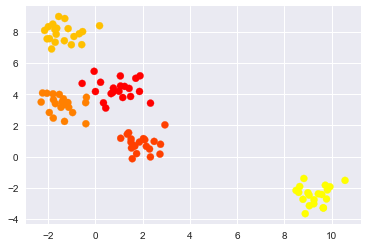

In [11]:
from sklearn.datasets.samples_generator import make_blobs
X, y = make_blobs(n_samples=100, centers=5,
                  random_state=0, cluster_std=0.60)
plt.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap='autumn');

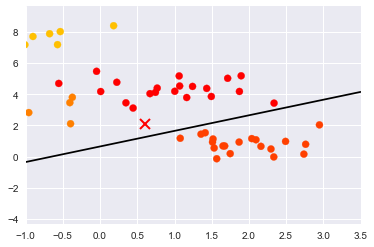

In [12]:
xfit = np.linspace(-1, 3.5)
plt.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap='autumn')
plt.plot([0.6], [2.1], 'x', color='red', markeredgewidth=2, markersize=10)

for m, b in [(1, 0.65)]:
    plt.plot(xfit, m * xfit + b, '-k')

plt.xlim(-1, 3.5);

In [10]:
import numpy as np
import matplotlib.pyplot as plt
# Though the following import is not directly being used, it is required
# for 3D projection to work
from mpl_toolkits.mplot3d import Axes3D

from sklearn.cluster import KMeans
from sklearn import datasets
from cycler import cycler


In [13]:
np.random.seed(5)


estimators = [('k_means_iris_8', KMeans(n_clusters=5)),
              ('k_means_iris_3', KMeans(n_clusters=5)),
              ('k_means_iris_bad_init', KMeans(n_clusters=5, n_init=1,
                                               init='random'))]

fignum = 1


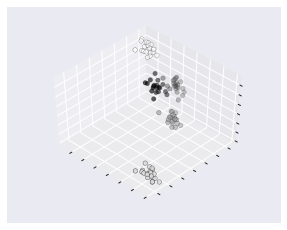

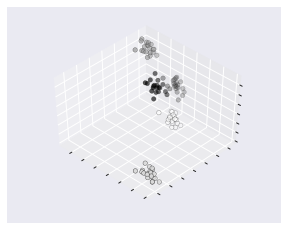

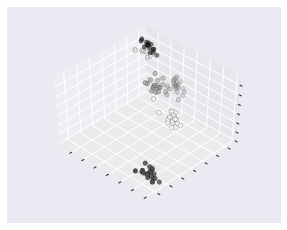

In [22]:
titles = ['8 clusters', '3 clusters', '3 clusters', 'bad initialization']
for name, est in estimators:
    fig = plt.figure(fignum, figsize=(4, 3))
    ax = Axes3D(fig, rect=[0, 0, .95, 1], elev=48, azim=134)
    est.fit(X)
    labels = est.labels_

    ax.scatter(X[:, 1], X[:, 0], X[:, 1],
               c=labels.astype(np.float), edgecolor='k')

    ax.w_xaxis.set_ticklabels([])
    ax.w_yaxis.set_ticklabels([])
    ax.w_zaxis.set_ticklabels([])
    
    ax.set_prop_cycle(cycler('color', ['c', 'm', 'y', 'k']) +
                   cycler('lw', [1, 2, 3, 4]))
    #ax.set_title(titles[fignum - 1])
    ax.dist = 12
    fignum = fignum + 1

# Plot the ground truth
fig = plt.figure(fignum, figsize=(4, 3))


In [23]:
ax = fig.add_axes()
ax = fig.add_axes([0, 0, 1, 1])

for name, label in [('Setosa', 0),
                    ('Versicolour', 1),
                    ('Virginica', 2)]:
    ax.text3D(X[y == label, 1].mean(),
              X[y == label, 0].mean(),
              X[y == label, 1].mean() + 2, name,
              horizontalalignment='center',
              bbox=dict(alpha=.2, edgecolor='w', facecolor='w'))
# Reorder the labels to have colors matching the cluster results
#y = np.choose(y, [1, 2, 0]).astype(np.float)
ax.scatter(X[:, 1], X[:, 0], X[:, 1], c=y, edgecolor='k')

ax.w_xaxis.set_ticklabels([])
ax.w_yaxis.set_ticklabels([])
ax.w_zaxis.set_ticklabels([])

ax.dist = 12

fig.show()

AttributeError: 'Axes' object has no attribute 'text3D'